<a href="https://colab.research.google.com/github/Nijasparveen/AI_Echo_Your_Smartest_Conversational_Partner/blob/main/ML%26DL_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries & Load Data**

In [3]:
# Install necessary libraries


!pip install nltk wordcloud

# Import libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1eyPDJj8ttd8t-o6JVT4txCbvJ9DtcF-U/export?format=csv&gid=1201624046")
print(df.shape)
df.head()

(50, 12)


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               50 non-null     object
 1   title              50 non-null     object
 2   review             50 non-null     object
 3   rating             50 non-null     int64 
 4   username           50 non-null     object
 5   helpful_votes      50 non-null     int64 
 6   review_length      50 non-null     int64 
 7   platform           50 non-null     object
 8   language           50 non-null     object
 9   location           50 non-null     object
 10  version            50 non-null     object
 11  verified_purchase  50 non-null     object
dtypes: int64(3), object(9)
memory usage: 4.8+ KB


In [7]:
df.isna().sum()

,0
date,0
title,0
review,0
rating,0
username,0
helpful_votes,0
review_length,0
platform,0
language,0
location,0


In [8]:
df.describe()

,rating,helpful_votes,review_length
count,50.000000,50.000000,50.000000
mean,3.000000,60.320000,13.400000
std,1.340119,25.288894,3.505098
min,1.000000,9.000000,7.000000
25%,2.000000,39.000000,10.000000
50%,3.000000,62.000000,13.000000
75%,4.000000,85.750000,16.000000
max,5.000000,99.000000,21.000000


**Data Preprocessing**

Data Cleaning

In [9]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
# Define sentiment from rating
def get_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

df["sentiment"] = df["rating"].apply(get_sentiment)

# Check distribution
print(df["sentiment"].value_counts())

sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64


In [11]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

import re
from nltk.tokenize import word_tokenize

# Initialize tools
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()                                # lowercase
    text = re.sub(r'[^a-z\s]', '', text)                    # remove punctuation/numbers
    tokens = nltk.word_tokenize(text)                       # tokenize
    tokens = [t for t in tokens if t not in stop_words]     # remove stopwords
    tokens = [lemmatizer.lemmatize(t) for t in tokens]      # lemmatization
    return " ".join(tokens)

df["clean_review"] = df["review"].apply(clean_text)

df[["review", "clean_review", "sentiment"]].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,review,clean_review,sentiment
0,Impressive natural language understanding. Alm...,impressive natural language understanding almo...,Negative
1,Sometimes gives wrong answers or outdated info...,sometimes give wrong answer outdated info stud...,Negative
2,Great tool for generating content quickly. Int...,great tool generating content quickly interest...,Positive
3,Great tool for generating content quickly. Sta...,great tool generating content quickly start me...,Neutral
4,Excellent for language translation and grammar...,excellent language translation grammar fix pri...,Negative


EDA

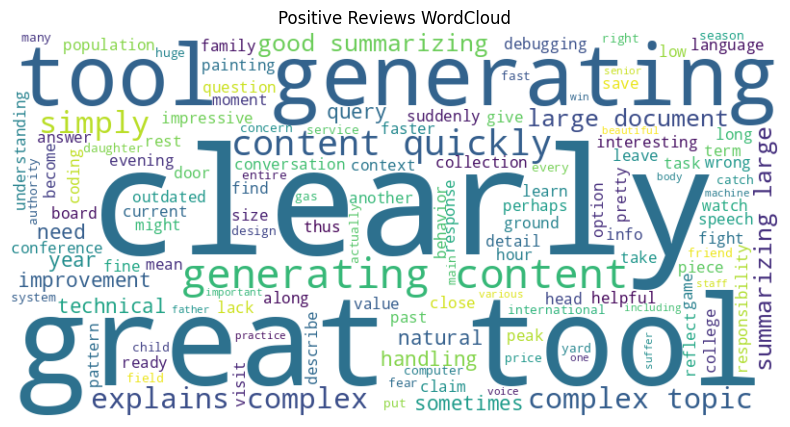

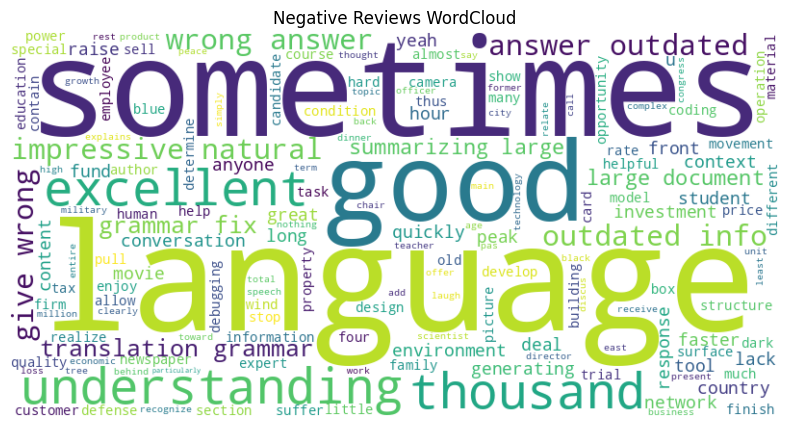

In [ ]:
# Positive wordcloud
positive_text = " ".join(df[df["sentiment"]=="Positive"]["clean_review"])
wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Reviews WordCloud")
plt.show()

# Negative wordcloud
negative_text = " ".join(df[df["sentiment"]=="Negative"]["clean_review"])
wordcloud_neg = WordCloud(width=800, height=400, background_color="white").generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Reviews WordCloud")
plt.show()

**Feature Extraction**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Features (cleaned text) and Labels (sentiment)
X = df["clean_review"]
y = df["sentiment"]

# Convert text to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)


**ML Models**


📌 Naive Bayes Results:
              precision    recall  f1-score   support

    Negative       0.43      0.75      0.55         4
     Neutral       0.00      0.00      0.00         3
    Positive       0.00      0.00      0.00         3

    accuracy                           0.30        10
   macro avg       0.14      0.25      0.18        10
weighted avg       0.17      0.30      0.22        10



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


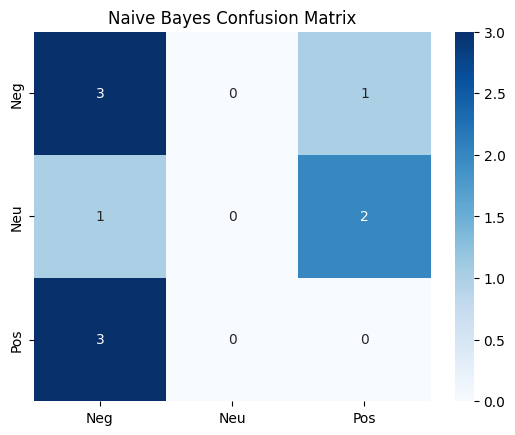


📌 Logistic Regression Results:
              precision    recall  f1-score   support

    Negative       0.43      0.75      0.55         4
     Neutral       0.00      0.00      0.00         3
    Positive       0.00      0.00      0.00         3

    accuracy                           0.30        10
   macro avg       0.14      0.25      0.18        10
weighted avg       0.17      0.30      0.22        10



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


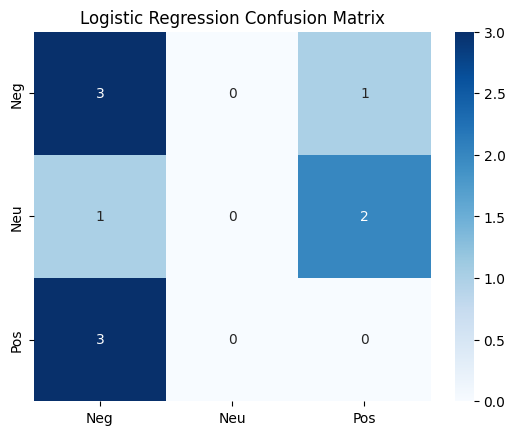


📌 Random Forest Results:
              precision    recall  f1-score   support

    Negative       0.33      0.50      0.40         4
     Neutral       0.00      0.00      0.00         3
    Positive       0.25      0.33      0.29         3

    accuracy                           0.30        10
   macro avg       0.19      0.28      0.23        10
weighted avg       0.21      0.30      0.25        10



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


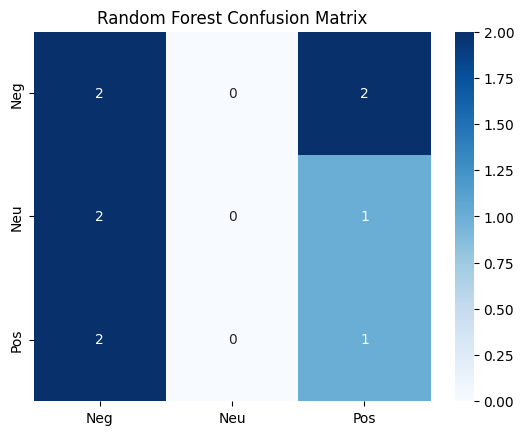


✅ Model Accuracies: {'Naive Bayes': 0.3, 'Logistic Regression': 0.3, 'Random Forest': 0.3}


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n📌 {name} Results:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=["Negative","Neutral","Positive"])
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Neg","Neu","Pos"], yticklabels=["Neg","Neu","Pos"])
    plt.title(f"{name} Confusion Matrix")
    plt.show()

print("\n✅ Model Accuracies:", results)


**Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# --- 1. Naïve Bayes ---
from sklearn.naive_bayes import MultinomialNB
nb_params = {
    "alpha": [0.1, 0.5, 1.0, 2.0]
}
grid_nb = GridSearchCV(MultinomialNB(), nb_params, cv=5, scoring="f1_macro", n_jobs=-1)
grid_nb.fit(X_train, y_train)
print("Best NB Params:", grid_nb.best_params_)
print("Best NB Score:", grid_nb.best_score_)

# --- 2. Logistic Regression ---
from sklearn.linear_model import LogisticRegression
lr_params = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],
    "solver": ["liblinear", "lbfgs"]
}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5, scoring="f1_macro", n_jobs=-1)
grid_lr.fit(X_train, y_train)
print("Best LR Params:", grid_lr.best_params_)
print("Best LR Score:", grid_lr.best_score_)

# --- 3. Random Forest ---
from sklearn.ensemble import RandomForestClassifier
rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
grid_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring="f1_macro", n_iter=10, n_jobs=-1, random_state=42)
grid_rf.fit(X_train, y_train)
print("Best RF Params:", grid_rf.best_params_)
print("Best RF Score:", grid_rf.best_score_)

Best NB Params: {'alpha': 1.0}
Best NB Score: 0.35952380952380947
Best LR Params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best LR Score: 0.37809523809523804
Best RF Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Best RF Score: 0.34135802469135806


**AUC-ROC**

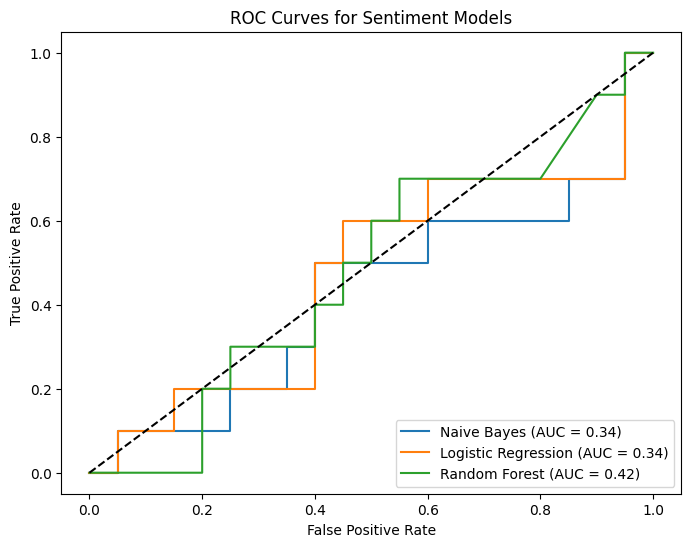

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Binarize labels for multiclass ROC
classes = ["Negative", "Neutral", "Positive"]
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(8,6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        # Some models (like SVM with linear kernel) use decision_function
        y_score = model.decision_function(X_test)

    # Compute ROC AUC (macro)
    roc_auc = roc_auc_score(y_test_bin, y_score, multi_class="ovr")
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc_value = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1],[0,1],'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Sentiment Models")
plt.legend(loc="lower right")
plt.show()

**Model performance summary**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize summary dictionary
metrics_summary = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    # Precision, Recall, F1 (macro average for multi-class)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")

    # AUC-ROC
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
        roc_auc = roc_auc_score(label_binarize(y_test, classes=classes), y_score, multi_class="ovr")
    else:
        roc_auc = None  # Skip if model doesn't support probabilities

    metrics_summary.append([name, acc, precision, recall, f1, roc_auc])

# Convert to DataFrame
results_df = pd.DataFrame(metrics_summary, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"])

print("\n📊 Model Performance Summary:")
print(results_df)


📊 Model Performance Summary:
                 Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0          Naive Bayes       0.3   0.142857  0.250000  0.181818  0.343254
1  Logistic Regression       0.3   0.142857  0.250000  0.181818  0.343254
2        Random Forest       0.3   0.194444  0.277778  0.228571  0.418651


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


DL Models

LSTM

In [28]:
# 📌 LSTM with Embeddings, Classification Report & ROC-AUC

!pip install tensorflow scikit-learn matplotlib

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Encode target labels
le = LabelEncoder()
# Fit the LabelEncoder on the original string labels
y_encoded = le.fit_transform(df["sentiment"])


# Tokenize text
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df["clean_review"])
X_seq = tokenizer.texts_to_sequences(df["clean_review"])
X_pad = pad_sequences(X_seq, maxlen=max_len)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pad, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(max_words, 128, input_length=max_len))
model_lstm.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(len(np.unique(y_encoded)), activation="softmax"))

model_lstm.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train
history = model_lstm.fit(X_train, y_train, validation_data=(X_test, y_test),
                         epochs=15, batch_size=32, verbose=1)

# Evaluate
loss, acc = model_lstm.evaluate(X_test, y_test)
print("✅ LSTM Accuracy:", acc)

# Predictions
y_pred_prob = model_lstm.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# 📌 Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=[str(c) for c in le.classes_]))

# 📌 ROC-AUC (One-vs-Rest for Multi-class)
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class="ovr")
print(f"\n🔹 ROC-AUC Score: {roc_auc:.4f}")

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 868ms/step - accuracy: 0.2604 - loss: 1.0986 - val_accuracy: 0.5000 - val_loss: 1.0921
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step - accuracy: 0.7604 - loss: 1.0818 - val_accuracy: 0.5000 - val_loss: 1.0918
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step - accuracy: 0.7021 - loss: 1.0655 - val_accuracy: 0.5000 - val_loss: 1.0902
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step - accuracy: 0.7396 - loss: 1.0486 - val_accuracy: 0.3000 - val_loss: 1.0887
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step - accuracy: 0.7500 - loss: 1.0285 - val_accuracy: 0.4000 - val_loss: 1.0890
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 303ms/step - accuracy: 0.6854 - loss: 1.0063 - val_accuracy: 0.4000 - val_loss: 1.0935
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step - accuracy: 0.6292 - loss: 0.9625 - val_accuracy: 0.4000 - val_loss: 1.1157
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step - accuracy: 0.5542 - loss: 0.9664 - val_accuracy: 0.4000 - val_loss: 1.1154
Epo

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


BERT Embeddings with Logistic regression

In [22]:
!pip install -q transformers sentence-transformers scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sentence_transformers import SentenceTransformer

# ✅ Use your clean reviews
text_col = "clean_review" if "clean_review" in df.columns else "review"
label_col = "sentiment"

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df[label_col].astype(str))
X_text = df[text_col].astype(str).tolist()

# Train-test split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Load pre-trained BERT embedding model
model = SentenceTransformer("bert-base-nli-mean-tokens")  # You can also try "all-MiniLM-L6-v2"

# Convert text → embeddings
X_train = model.encode(X_train_text, batch_size=32, show_progress_bar=True)
X_test  = model.encode(X_test_text,  batch_size=32, show_progress_bar=True)

# ✅ Train classifier on embeddings
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

# ✅ Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# ROC-AUC (macro)
y_test_bin = label_binarize(y_test, classes=list(range(len(le.classes_))))
auc = roc_auc_score(y_test_bin, y_proba, average="macro", multi_class="ovr")
print("ROC-AUC (macro):", auc)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Accuracy: 0.3

Classification Report:
               precision    recall  f1-score   support

    Negative       0.20      0.25      0.22         4
     Neutral       0.50      0.33      0.40         3
    Positive       0.33      0.33      0.33         3

    accuracy                           0.30        10
   macro avg       0.34      0.31      0.32        10
weighted avg       0.33      0.30      0.31        10

ROC-AUC (macro): 0.36706349206349204
